# Exámen Interciclo P1
Realizado por: Tatiana Cárdenas

In [1]:
from IPython.display import Image

# Análisis del problema:

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes posteriores a las elecciones presidenciales son el análisis y tendencia que tiene el actual presidente. Para ello se planteo realizar un sistema de regresión que permita identificar cual es la tendencia en base al manejo de las redes sociales de Twitter del presidente electo el 24 de mayo, Guillermo Lasso.

Para la recopilacion de datos se ha procedido a crear una cuenta de desarrollador en Twitter para poder registrar una nueva APP, de tal manera que con la ayuda de Tweepy, siendo esta una librería para Python 2.6, 2.7, y 3. x que permite acceder al API de Twitter, de tal manera que provee acceso a todos los métodos API RESTful, incluyendo la lectura y escritura de tweets, en este caso, vamos a leer los Tweets de Guillermo Lasso.

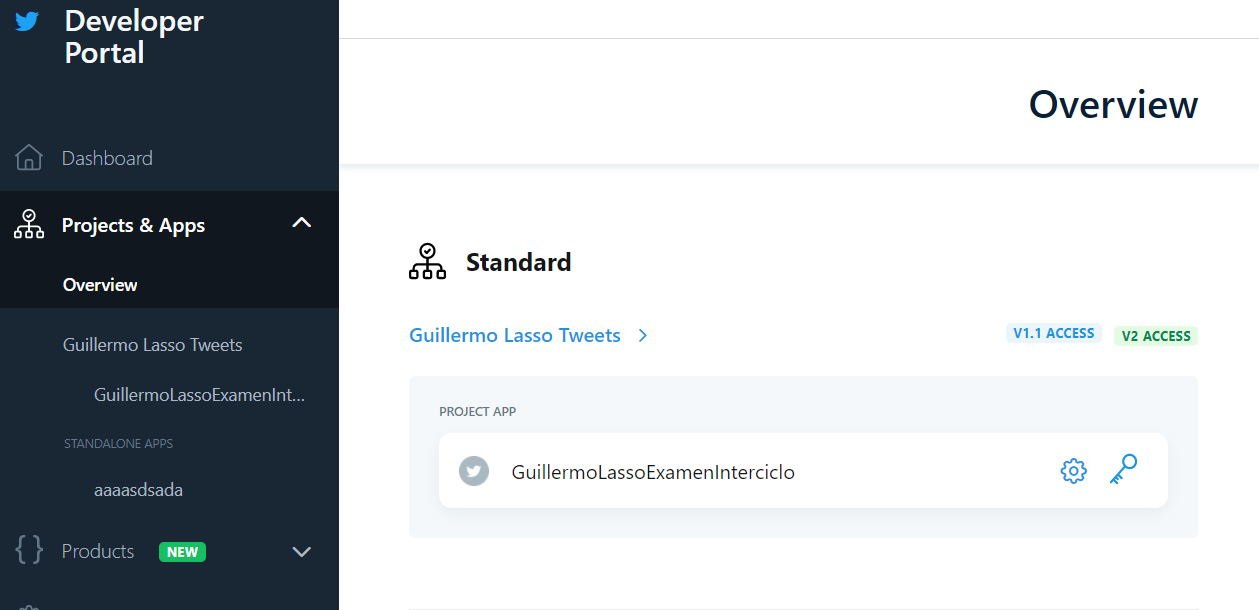

In [3]:
Image("1.png", width=500, height=500)

-------------------------------------------------------------------------------------------------------------------------------

In [34]:
#Importación de librerías
import tweepy
import json
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np


print('Importadas')

Importadas


Tras crear la api de Twitter, procedemos a revisar los tokens que necesitaremos para poder acceder a la informacion del mandatario, estos tokens, se visualizan en la api que se creo como se muestra a continuación:

Para poder acceder a los mismos es necesario seleccionar el botón de regenerar y aparerá sin ningun problema, sin embargo, cada vez que se regenere un token, es necesario cambiar en el codigo donde se esté trabajando.

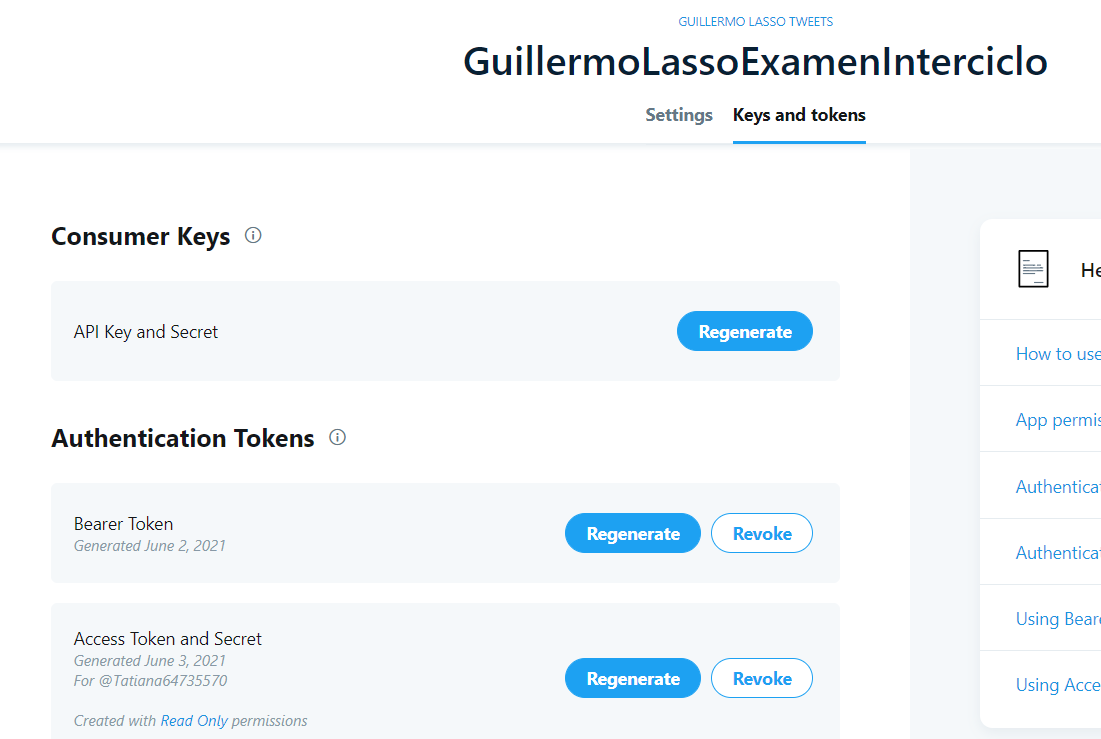

In [31]:
Image("2.png", width=500, height=500)

In [32]:
#Api para acceder a los tweets y claves de la api para poder acceder.
access_token="1400175729267163138-iDTuUVPeNNxhBNkohIruIg6XaKdm2g"
access_token_secret="79ftXKrMLTDGBIquTPhVHryO9N9qWdrf5d0Kc8H2fS4Ed"
consumer_key="1Y60IOoBpUJotVhezhQqQyJKk"
consumer_secret="AQAr8GVvXaLsdMqMyMokF7IZteCaBSRUdtietwQysVnKRjSFtF"
auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

#Se trabajará con 1000 Tweets
tweets_num=1000

Almacenamiento de los Tweets: los tweets que contengan la palabra "LassoGuillermo", se filtraran y de manera inicial se almacenará dentro de un archivo de texto.

In [ ]:
#metodo que permitira almacenan los tweets obtenidos en un txt
tweetsObtenidos=[]
class Tweets(tweepy.StreamListener):
    
    def __init__(self,api=None):
        super(Tweets,self).__init__()
        self.num_tweets=0
        self.file=open("tweetsGuillermoLasso.txt","w")
    
    def on_status(self,status):
        tweet=status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweetsObtenidos.append(status)
        self.num_tweets+=1
        if self.num_tweets<tweets_num:
            return True
        else:
            return False
        self.file.close()
        
#crear objeto de transmisión y autenticar
tweet = Tweets()
stream =tweepy.Stream(auth,tweet)


# Filtra flujos para capturar datos por palabras clave
stream.filter(track=['LassoGuillermo'])

Posterior se haya creado el txt, procedemos a crear un archivo csv donde se integrarán los datos obtenidos y lo leeremos para el analisis de datos como se presenta a continuación:

In [35]:
#Carga de datos

#Variables
#dataset = pd.read_csv('dataset.csv')
#print(dataset.head())

df=pd.read_csv('tweetsGuillermoLasso.csv') 
df = df[df.Text.notna()]
df.sample(5)

,UserName,Handle,Timestamp,Text,Comments,Likes,Retweets
253,Guillermo Lasso,@LassoGuillermo,2021-03-20T16:01:10.000Z,"Encontrémonos por un Ecuador seguro, justo e i...",151,380,"1,2 mil"
371,Guillermo Lasso,@LassoGuillermo,2021-02-14T21:48:20.000Z,Hoy he presentado una carta a \n@DianaAtamaint...,855,1 mil,"2,6 mil"
196,Guillermo Lasso,@LassoGuillermo,2021-04-04T01:17:05.000Z,MANABÍ CON EDUCACIÓN SUPERIOR Y DE CALIDAD. \n...,195,621,"2,5 mil"
249,Guillermo Lasso,@LassoGuillermo,2021-03-21T21:19:11.000Z,Basta ya de separar. Encontrémonos por un mejo...,125,538,"1,6 mil"
233,Guillermo Lasso,@LassoGuillermo,2021-03-24T19:30:48.000Z,El Guabo es hogar de miles de agricultores en ...,208,274,846


In [36]:
#Analizamos el tipo de dato que tiene el dataset en caso de que tengamos que convertir algún valor
df.dtypes

UserName     object
Handle       object
Timestamp    object
Text         object
Comments     object
Likes        object
Retweets     object
dtype: object

In [37]:
df.describe().round(3)

,UserName,Handle,Timestamp,Text,Comments,Likes,Retweets
count,415,415,415,415,415,415,415
unique,21,21,383,397,272,285,162
top,Guillermo Lasso,@LassoGuillermo,2021-04-22T15:51:47.000Z,En honor a la transparencia y a la voluntad po...,199,1 mil,"1,3 mil"
freq,391,391,3,2,6,16,21


In [38]:
df.keys()

Index(['UserName', 'Handle', 'Timestamp', 'Text', 'Comments', 'Likes',
       'Retweets'],
      dtype='object')

In [39]:
df.head()

,UserName,Handle,Timestamp,Text,Comments,Likes,Retweets
0,Guillermo Lasso,@LassoGuillermo,2021-05-29T21:35:01.000Z,¡Felicidades \n@MorejonGlenda\n! Ella y más de...,24,153,762
1,Guillermo Lasso,@LassoGuillermo,2021-05-28T23:57:43.000Z,¡Una buena noticia!\n@EmbajadaChinaEc\n me inf...,628,"1,6 mil","10,5 mil"
2,Guillermo Lasso,@LassoGuillermo,2021-05-28T22:23:22.000Z,¡Primera visita a Guayas! Nos reunimos en la G...,134,398,2 mil
3,Guillermo Lasso,@LassoGuillermo,2021-05-26T16:59:31.000Z,Los invito a acompañarnos en este emotivo even...,108,293,"1,1 mil"
4,Guillermo Lasso,@LassoGuillermo,2021-05-26T15:37:41.000Z,FAMILIA.\n\n#JuntosLoLogramos,703,"1,4 mil","16,7 mil"


Tratamiento de datos: Como se pudo observar anteriormente, la culumna de "Retweets" contiene el numero de retweets y la palabra mil, por lo que nosotros solo necesitamos el numero del mismo. A continuacion se procede a hacer una limpieza de datos, en la cual eliminaremos la palabra mil de la columna y otros valores que no son de nuestro interes.

In [40]:
#Este metodo cambia los nombres de las columnas y elemina la palabra mil de los valroes que obtiene de los tweets
#Se vuelve a leer para hacer el cambio de valores
df=pd.read_csv('tweetsGuillermoLasso.csv') 
df = df[df.Text.notna()]

df.Comments = df.Comments.replace([r'[ mil]+$',','], ['00',''], regex=True)
df.Likes = df.Likes.replace([r'[ mil]+$',','], ['00',''], regex=True)
df.Retweets = df.Retweets.replace([r'[ mil]+$',','], ['00',''], regex=True)
df.Text = df.Text.replace([r'Citar Tweet'], [' Citar Tweet'], regex=True)

df['Hashtags'] = df.Text.str.findall(r'#.*?(?=\s|$)').str.len()
df['PalabrasTotales']= df.Text.apply(lambda x: len(x.split()))
df['links'] = df.Text.apply(lambda x: 1 if str(x).find('Citar Tweet') != -1 else 0)

df = df.astype({"Comments": float, "Likes": float, "Retweets": float,"Hashtags": float, "PalabrasTotales": float, "links": float})

# Regresion Lineal

In [41]:
#Variables

x = df[['Comments', 'Likes','Hashtags','PalabrasTotales','links']] #datos de los tweets
y = df['Retweets'].values.reshape(-1,1) #cuantas veces se hizo reteewt


In [42]:
#Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=100) 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression()

In [43]:
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
date_predicted = linear_regressor.predict(x)

In [44]:
print('Pentiende:', linear_regressor.coef_)
print('Intersección":',  linear_regressor.intercept_)


Pentiende: [[   2.00623349    3.98454973  -87.26100817    5.76695741 -297.02146178]]
Intersección": [36.37660732]


In [45]:
y_pred = regressor.predict(X_test)  
df1= pd.DataFrame({'Data Actual': y_test.flatten().astype(float), 'prediccion': y_pred.flatten()}) 
df1
preRF=r2_score(y_test,y_pred)
print("Precisión del modelo: ", preRF) 

Precisión del modelo:  0.7300922654248645


# Regresión Polinomial:

In [46]:
#Variables

x = df[['Comments', 'Likes','Hashtags','PalabrasTotales','links']] #datos de los tweets
y = df['Retweets'].values.reshape(-1,1) #cuantas veces se hizo reteewt

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
poly_reg = PolynomialFeatures(degree=8)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [48]:
y_pred2 = pol_reg.predict(poly_reg.fit_transform(X_test)) 
df2 = pd.DataFrame({'Data Actual': y_test.flatten(), 'Data de Prediccion': y_pred2.flatten()}) 
df2
preRF=r2_score(y_test,y_pred2)
print("Precisión del modelo: ", preRF)

Precisión del modelo:  0.6871267305399844


# Gráficas representativas de los resultados:

Regresión lineal:

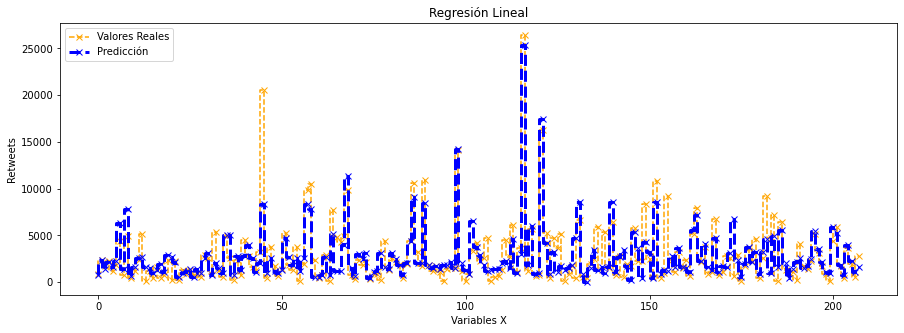

In [56]:
plt.figure(figsize = (15,5))
X = np.arange(len(y_test))
y = df['Retweets'].values.reshape(-1,1)

plt.step(X, df1['Data Actual'],'x--', label ='Valores Reales', color='orange',)
plt.step(X, df1['prediccion'], 'x--', label = 'Predicción',linewidth = 3, color='blue')
plt.title('Regresión Lineal') 
plt.xlabel('Variables X')
plt.ylabel('Retweets')
plt.legend(loc="upper left") 

plt.show()

Regresion Polinomial:

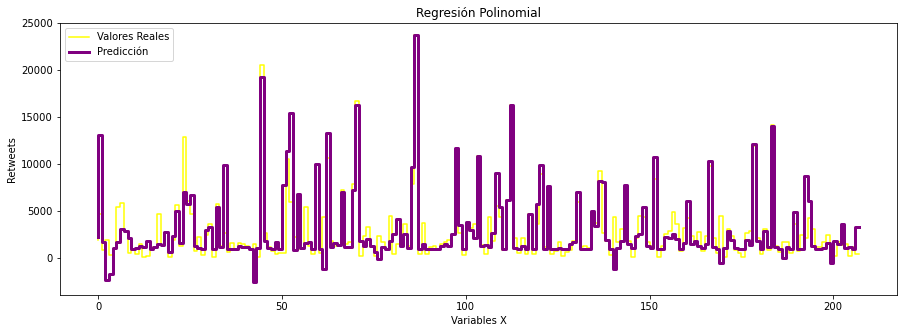

In [59]:
plt.figure(figsize = (15,5))
X = np.arange(len(y_test))
y = df['Retweets'].values.reshape(-1,1)
plt.step(X, df2['Data Actual'],'-', label ='Valores Reales',  color='yellow')
plt.step(X, df2['Data de Prediccion'], '-', label = 'Predicción', linewidth = 3, color='purple')
plt.title('Regresión Polinomial') 
plt.xlabel('Variables X')
plt.ylabel('Retweets')
plt.legend(loc="upper left") 
plt.show()

# Pruebas:

In [163]:
# Tweet a predecir seleccionado.
# es uno de los mas retweeteados ya que habla sobre la vacunacion y el convenio de firma para la obtencion de los mismos.
df[9:10]

,UserName,Handle,Timestamp,Text,Comments,Likes,Retweets,Hashtags,PalabrasTotales,links
9,Guillermo Lasso,@LassoGuillermo,2021-05-25T16:16:52.000Z,Fue un honor recibir a representantes de \n@US...,207.0,638.0,2900.0,2.0,38.0,0.0


Predicción lineal vs Prediccion Polinomial:

In [166]:
xTest = df[200:201][['Comments', 'Likes','Hashtags','PalabrasTotales','links']]

print('Predicción regresión lineal:', regressor.predict(xTest))
print('Predicción regresión polinomial: ',pol_reg.predict(poly_reg.fit_transform(xTest)))

Predicción regresión lineal: [[6158.90830662]]
Predicción regresión polinomial:  [[10292.23326259]]


Referencias: 
* https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf
* https://docs.tweepy.org/en/stable/